In [1]:
import platform
platform.python_version()
#3.9.16
#import tensorflow as tf

'3.9.12'

In [2]:
DESC.__version__

NameError: name 'DESC' is not defined

NameError: name 'sc' is not defined

In [6]:
#import tensorflow as tf
import scanpy as sc
import desc as DESC
import numpy as np
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
sc.settings.verbosity = 3            

In [77]:
#read in anndata
adata = sc.read_h5ad('my_ann.h5ad')

In [78]:
adata

AnnData object with n_obs × n_vars = 19214 × 23433
    obs: 'tissue', 'cell_ontology_class', 'cell_ontology_term_iri', 'cell_ontology_id'
    var: 'gene_id'

In [80]:
adata.obs["tissue"]

A21.MAA000508.3_9_M.1.1     Spleen
C6.MAA000508.3_9_M.1.1      Spleen
A22.MAA000508.3_9_M.1.1     Spleen
C8.MAA000508.3_9_M.1.1      Spleen
E8.MAA000508.3_9_M.1.1      Spleen
                             ...  
P18.MAA001888.3_39_F.1.1    Marrow
P19.MAA001888.3_39_F.1.1    Marrow
P20.MAA001888.3_39_F.1.1    Marrow
P21.MAA001888.3_39_F.1.1    Marrow
P22.MAA001888.3_39_F.1.1    Marrow
Name: tissue, Length: 19214, dtype: category
Categories (6, object): ['', 'Brain_Microglia', 'Brain_Neurons', 'Marrow', 'Spleen', 'Thymus']

In [8]:
#another way to read in anndata
adata = DESC.read_h5ad('my_ann.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 19214 × 23433
    obs: 'tissue', 'cell_ontology_class', 'cell_ontology_term_iri', 'cell_ontology_id'
    var: 'gene_id'

In [10]:
#filter cells
sc.pp.filter_cells(adata, min_genes=200)
#filter over 700 cells

filtered out 713 cells that have less than 200 genes expressed


In [11]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2168 genes that are detected in less than 3 cells


In [12]:
adata.n_obs

18501

In [13]:
len(adata.var_names)

21265

In [14]:
mito_genes = adata.var_names.str.startswith('MT-')

In [15]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [16]:
adata.obs

,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id,n_genes,percent_mito,n_counts
A21.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,1468,0.0,149684.0
C6.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2169,0.0,264643.0
A22.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,2527,0.0,404945.0
C8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2742,0.0,425330.0
E8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2315,0.0,314558.0
...,...,...,...,...,...,...,...
P18.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,2463,0.0,175214.0
P19.MAA001888.3_39_F.1.1,Marrow,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,1557,0.0,100486.0
P20.MAA001888.3_39_F.1.1,Marrow,natural killer cell,http://purl.obolibrary.org/obo/CL_0000623,CL:0000623,2402,0.0,265782.0
P21.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,1963,0.0,82693.0


In [17]:
adata.var = adata.var.set_index("gene_id")

In [18]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],jitter=0.4, multi_panel=True)

In [19]:
adata.X

array([[ 0., 36.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0., 14.,  0., ...,  0.,  0.,  0.],
       [ 0., 50.,  0., ...,  0.,  0., 36.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [20]:
adata.var_names

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik',
       '0610009B14Rik', '0610009B22Rik',
       ...
       'Zxda', 'Zxdb', 'Zxdc', 'Zyg11a', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6'],
      dtype='object', name='gene_id', length=21265)

In [21]:
#normalize data
sc.pp.normalize_per_cell(adata,counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:35): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [22]:
#apply log normalization
sc.pp.log1p(adata)

In [23]:
adata.raw=adata

In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)

extracting highly variable genes
    finished (0:00:20)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [25]:
adata

AnnData object with n_obs × n_vars = 18501 × 4052
    obs: 'tissue', 'cell_ontology_class', 'cell_ontology_term_iri', 'cell_ontology_id', 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [26]:
#scale data
DESC.scale(adata, zero_center=True, max_value=3)

In [27]:
#run DESC
adata = DESC.train(adata, dims=[adata.shape[1], 64, 32], tol=0.005, n_neighbors=10,
                   batch_size=256, louvain_resolution=[0.8, 1.0],
                   save_dir="clust_results", do_tsne=True, learning_rate=300,
                   do_umap=True, num_Cores=1, num_Cores_tsne=4,
                   save_encoder_weights=False)

Start to process resolution= 0.8
The number of cpu in your computer is 8



2023-04-22 16:52:47.347487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 16:52:47.419719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-22 16:52:47.420856: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-22 16:52:47.424992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-R1ALRHG): /proc/driver/nvidia/version does not exist


Checking whether clust_results/ae_weights.h5  exists in the directory
Pretraining time is 0.0934140682220459
579/579 [==============================] - 2s 2ms/step
...number of clusters is unknown, Initialize cluster centroid using louvain method
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:45)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 24 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:02)
The value of delta_label of current 1 th iteration is 0.060375114858656286 >= tol 0.005
Epoch 1/5
73/73 [==============================] - 2s 12ms/step - loss: 0.3144
Epoch 2/5
73/73 [==============================] - 1s 13ms/step - loss: 0.2404
Epoch 3/5
73/73 [==============================] - 1s 12ms/step - loss: 0.2064
Epoch 4/5
73/73 [==============================] 

/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(
/home/sarahwealth/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:03:26)
tsne finished and added X_tsne0.8  into the umap coordinates (adata.obsm)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)
umap finished and added X_umap0.8  into the umap coordinates (adata.obsm)

Start to process resolution= 1.0
The number of cpu in your computer is 8
Checking whether clust_results/ae_weights.h5  exists in the directory
Pretraining time is 0.12847375869750977
579/579 [==============================] - 1s 2ms/step
...number of clusters is unknown, Initialize cluster centroid using louvain method
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacen

/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_tsne.py:113: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(
/home/sarahwealth/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:02:53)
tsne finished and added X_tsne1.0  into the umap coordinates (adata.obsm)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
umap finished and added X_umap1.0  into the umap coordinates (adata.obsm)

The run time for all resolution is: 600.2944247722626
After training, the information of adata is:
 AnnData object with n_obs × n_vars = 18501 × 4052
    obs: 'tissue', 'cell_ontology_class', 'cell_ontology_term_iri', 'cell_ontology_id', 'n_genes', 'percent_mito', 'n_counts', 'desc_0.8', 'desc_1.0'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'tsne', 'umap', 'prob_matrix0.8', 'prob_matrix1.0'
    obsm: 'X_Embeded_

In [108]:
adata.var_names

Index(['0610007N19Rik', '0610010O12Rik', '0610011L14Rik', '0610030E20Rik',
       '0610043K17Rik', '1100001G20Rik', '1110008J03Rik', '1110012J17Rik',
       '1110028C15Rik', '1110032A03Rik',
       ...
       'Zmym1', 'Znf512b', 'Znfx1', 'Zranb1', 'Zranb3', 'Zrsr2', 'Zscan21',
       'Zswim3', 'Zwint', 'Zyg11b'],
      dtype='object', name='gene_id', length=4052)

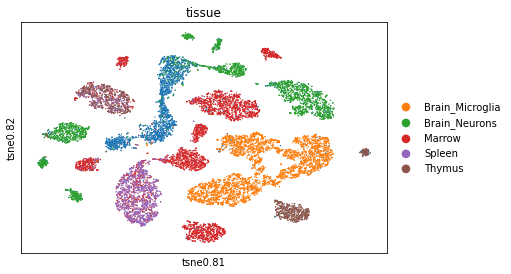

In [57]:
prob_08=adata.uns["prob_matrix0.8"]
adata.obs["max.prob0.8"]=np.max(prob_08,axis=1)
#tSNE plot 
sc.pl.scatter(adata,basis="tsne0.8",color='tissue')

In [29]:
adata.obs[adata.obs["tissue"] == ""]

,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id,n_genes,percent_mito,n_counts,desc_0.8,desc_1.0,max.prob0.8
L11.MAA000559.3_8_M.1.1,,,,,1324,0.0,14456.0,1,1,0.586648
J7.MAA000559.3_8_M.1.1,,,,,1023,0.0,18163.0,1,1,0.652417
O9.MAA000559.3_8_M.1.1,,,,,246,0.0,115357.0,9,9,0.524391
A13.MAA000776.3_10_M.1.1,,,,,6200,0.0,2056837.0,2,3,0.656287
A14.MAA000776.3_10_M.1.1,,,,,443,0.0,561297.0,9,9,0.533769
...,...,...,...,...,...,...,...,...,...,...
B21.MAA001887.3_39_F.1.1,,,,,277,0.0,9241.0,9,9,0.533265
O22.MAA001887.3_39_F.1.1,,,,,229,0.0,5694.0,9,9,0.534582
M2.MAA001888.3_39_F.1.1,,,,,1758,0.0,45531.0,15,16,0.512256
N18.MAA001888.3_39_F.1.1,,,,,2409,0.0,37706.0,1,1,0.594313


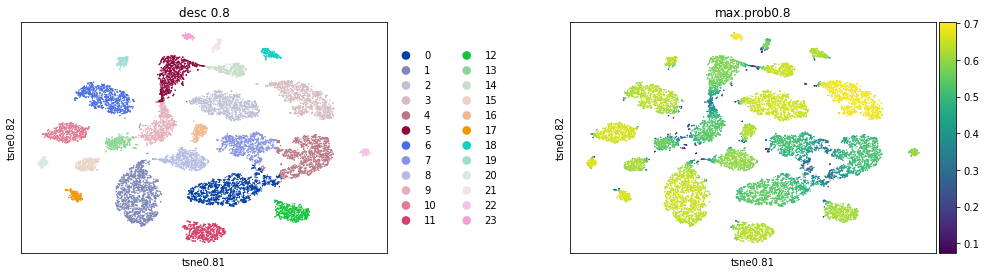

In [251]:
sc.pl.scatter(adata,basis="tsne0.8",color=['desc_0.8',"max.prob0.8"])


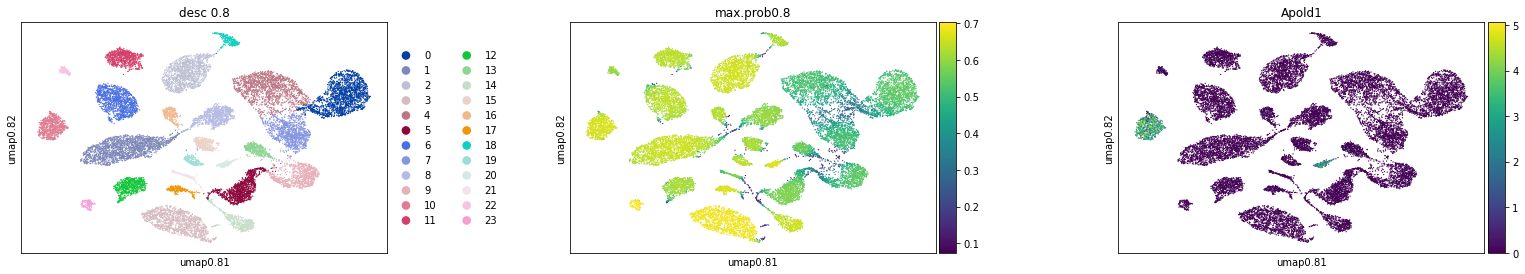

In [112]:
sc.pl.scatter(adata,basis="umap0.8",color=['desc_0.8',"max.prob0.8","Apold1"])

In [83]:
adata.obs

,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id
A21.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084
C6.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236
A22.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084
C8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236
E8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236
...,...,...,...,...
P18.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084
P19.MAA001888.3_39_F.1.1,Marrow,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236
P20.MAA001888.3_39_F.1.1,Marrow,natural killer cell,http://purl.obolibrary.org/obo/CL_0000623,CL:0000623
P21.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084


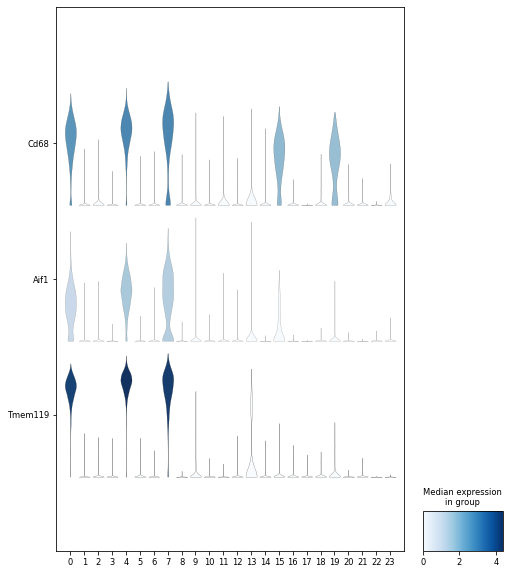

In [273]:
adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Cd68","Aif1","Tmem119"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

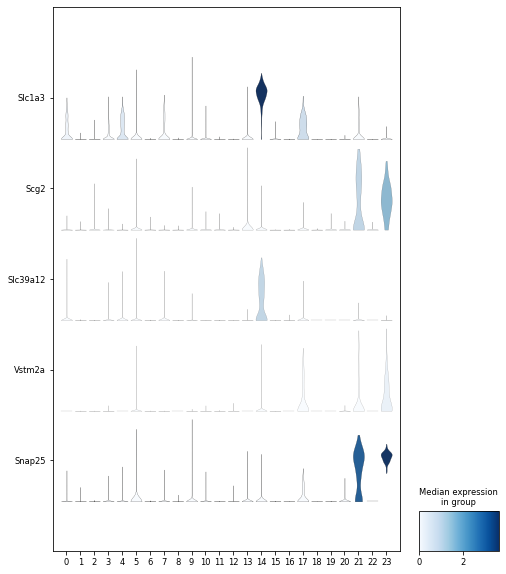

In [275]:
adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Slc1a3","Scg2","Slc39a12","Vstm2a","Snap25"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

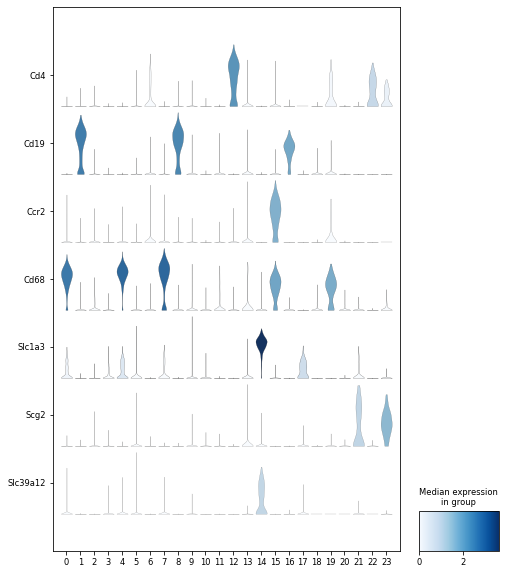

In [74]:
adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Cd4","Cd19","Ccr2","Cd68","Slc1a3","Scg2","Slc39a12"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

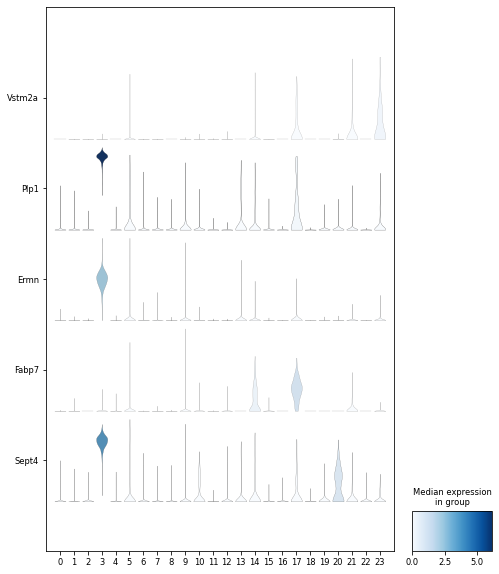

In [83]:
adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Vstm2a","Plp1","Ermn","Fabp7","Sept4"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

In [96]:
adata.var_names

Index(['0610007N19Rik', '0610010O12Rik', '0610011L14Rik', '0610030E20Rik',
       '0610043K17Rik', '1100001G20Rik', '1110008J03Rik', '1110012J17Rik',
       '1110028C15Rik', '1110032A03Rik',
       ...
       'Zmym1', 'Znf512b', 'Znfx1', 'Zranb1', 'Zranb3', 'Zrsr2', 'Zscan21',
       'Zswim3', 'Zwint', 'Zyg11b'],
      dtype='object', name='gene_id', length=4052)

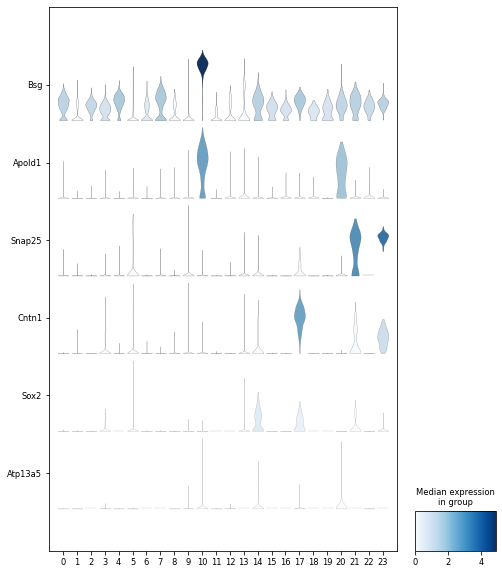

In [134]:
adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Bsg","Apold1","Snap25","Cntn1","Sox2","Atp13a5"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

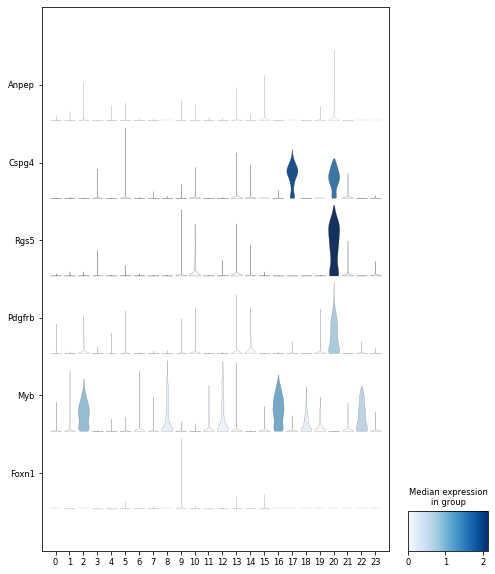

In [138]:

adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Anpep", "Cspg4", "Rgs5","Pdgfrb","Myb","Foxn1"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

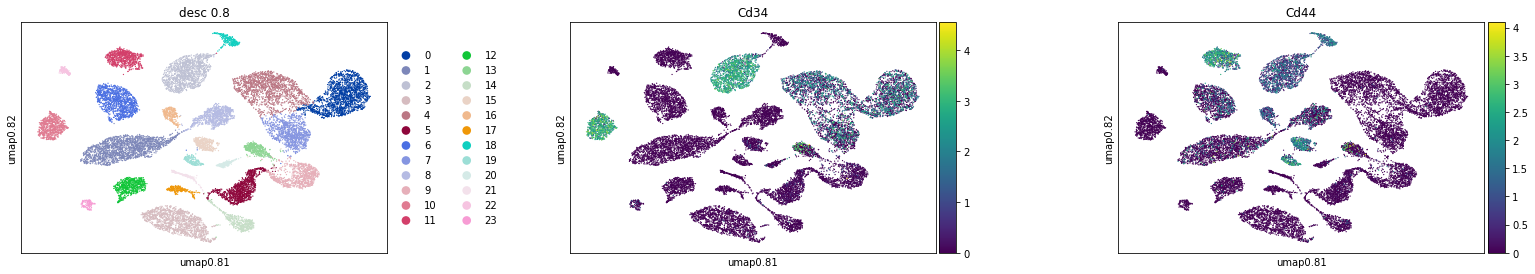

In [173]:
sc.pl.scatter(adata,basis="umap0.8",color=['desc_0.8', "Cd34","Cd44"])

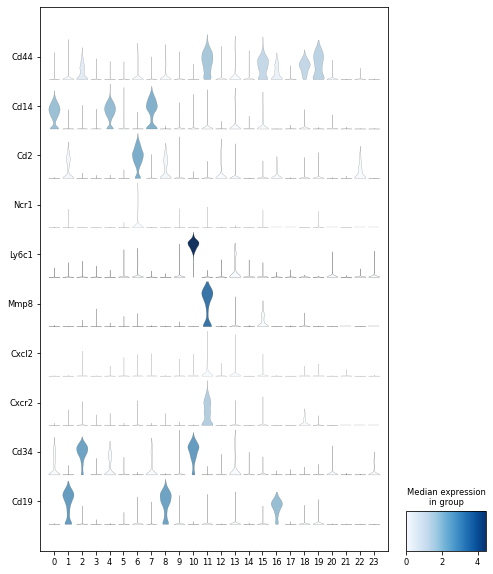

In [211]:

adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Cd44","Cd14","Cd2","Ncr1","Ly6c1","Mmp8","Cxcl2","Cxcr2","Cd34","Cd19"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

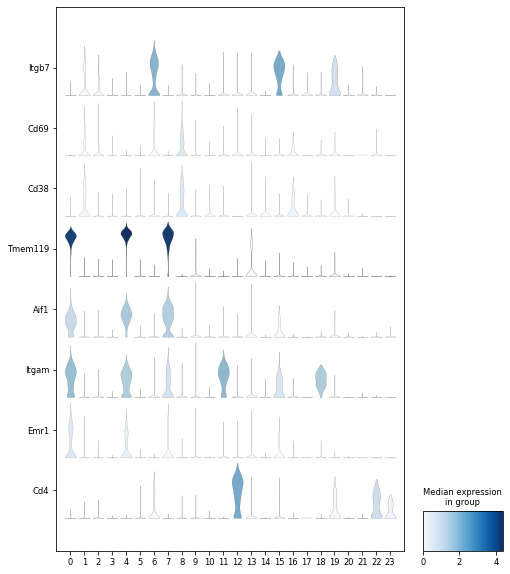

In [302]:

adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Itgb7", "Cd69","Cd38","Tmem119","Aif1","Itgam","Emr1","Cd4"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

In [ ]:
IL7R	CD4 T cells
1	CD14, LYZ	CD14+ Monocytes
2	MS4A1	B cells
3	CD8A, Cd2	CD8 T cells
4	GNLY, NKG7	NK cells
5	FCGR3A, MS4A7	FCGR3A+ Monocytes
6	FCER1A, CST3	Dendritic Cells
7	PPBP

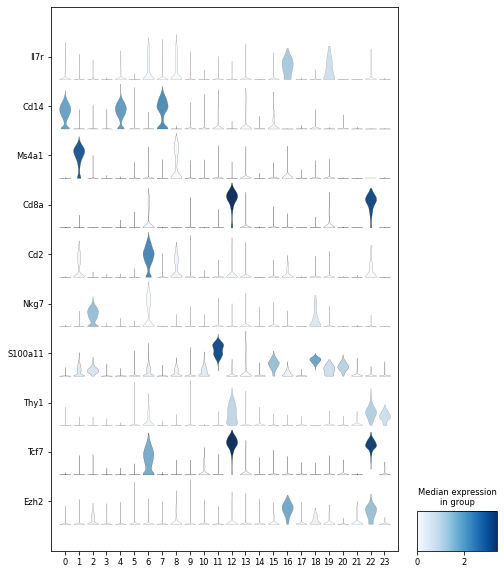

In [321]:

#adata.obs["desc_0.8"]=adata.obs["desc_0.8"].astype(str)
sc.pl.stacked_violin(adata, ["Il7r", "Cd14","Ms4a1","Cd8a","Cd2","Nkg7","S100a11","Thy1","Tcf7","Ezh2"],
                     groupby='desc_0.8',figsize=(8,10),swap_axes=True)

In [ ]:
#annotation

In [255]:
sc.tl.rank_genes_groups(adata, 'desc_0.8', method='wilcoxon')

ranking genes


/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame i

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:13:43)


/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
/home/sarahwealth/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [359]:
adata.obs["desc_0.8"]

A21.MAA000508.3_9_M.1.1      6
C6.MAA000508.3_9_M.1.1       1
A22.MAA000508.3_9_M.1.1      6
C8.MAA000508.3_9_M.1.1       1
E8.MAA000508.3_9_M.1.1       1
                            ..
P18.MAA001888.3_39_F.1.1     6
P19.MAA001888.3_39_F.1.1     1
P20.MAA001888.3_39_F.1.1     6
P21.MAA001888.3_39_F.1.1     6
P22.MAA001888.3_39_F.1.1    13
Name: desc_0.8, Length: 18501, dtype: category
Categories (24, object): ['0', '1', '2', '3', ..., '20', '21', '22', '23']

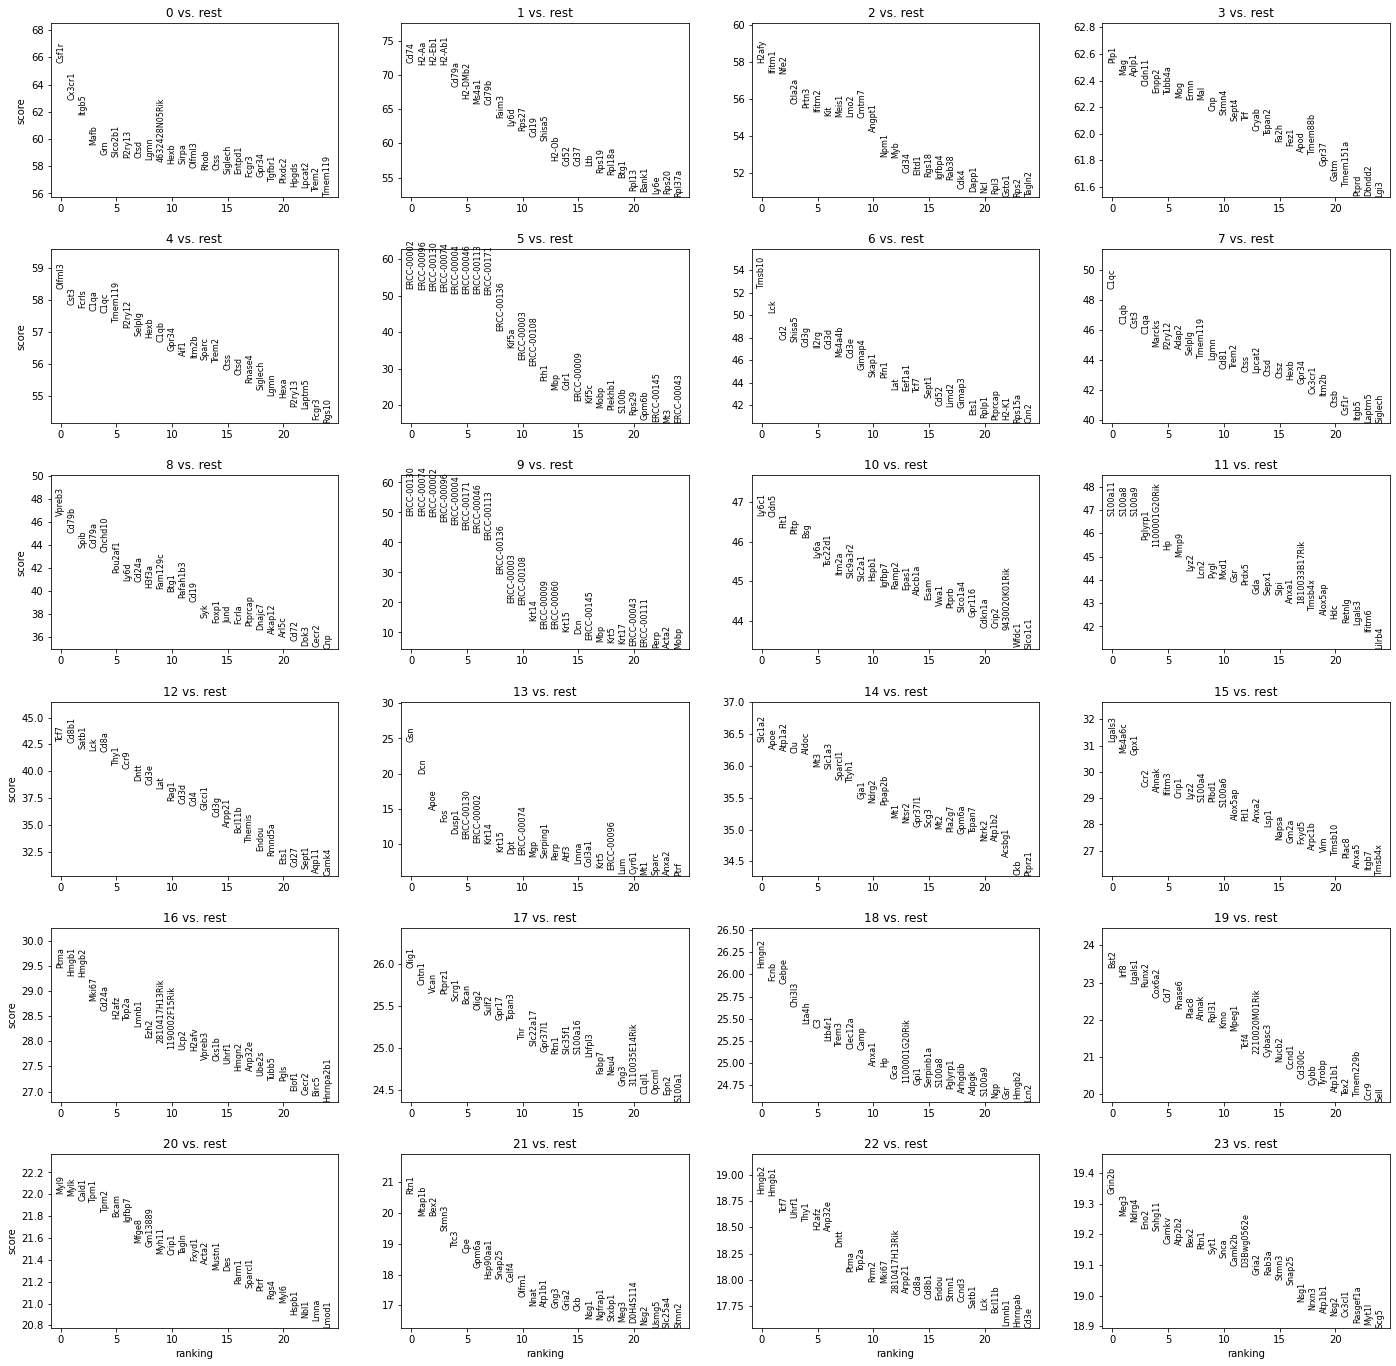

In [256]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [291]:
df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

In [294]:
df["0"]

0         Csf1r
1        Cx3cr1
2         Itgb5
3          Mafb
4           Grn
          ...  
21260    Tmsb10
21261     Calm1
21262     Rpl41
21263    Iqgap1
21264     Sepw1
Name: 0, Length: 21265, dtype: object

In [347]:
(pd.DataFrame(adata.uns['rank_genes_groups']['names']))["2"].head(10)

0     H2afy
1    Ifitm1
2      Nfe2
3    Ctla2a
4     Prtn3
5    Ifitm2
6       Kit
7     Meis1
8      Lmo2
9     Cmtm7
Name: 2, dtype: object

In [280]:
adata.uns['rank_genes_groups']["names"]

rec.array([('Csf1r', 'Cd74', 'H2afy', 'Plp1', 'Olfml3', 'ERCC-00002', 'Tmsb10', 'C1qc', 'Vpreb3', 'ERCC-00130', 'Ly6c1', 'S100a11', 'Tcf7', 'Gsn', 'Slc1a2', 'Lgals3', 'Ptma', 'Olig1', 'Hmgn2', 'Bst2', 'Myl9', 'Rtn1', 'Hmgb2', 'Grin2b'),
           ('Cx3cr1', 'H2-Aa', 'Ifitm1', 'Mag', 'Cst3', 'ERCC-00096', 'Lck', 'C1qb', 'Cd79b', 'ERCC-00074', 'Cldn5', 'S100a8', 'Cd8b1', 'Dcn', 'Apoe', 'Ms4a6c', 'Hmgb1', 'Cntn1', 'Fcnb', 'Irf8', 'Mylk', 'Mtap1b', 'Hmgb1', 'Meg3'),
           ('Itgb5', 'H2-Eb1', 'Nfe2', 'Aplp1', 'Fcrls', 'ERCC-00130', 'Cd2', 'Cst3', 'Spib', 'ERCC-00002', 'Flt1', 'S100a9', 'Satb1', 'Apoe', 'Atp1a2', 'Gpx1', 'Hmgb2', 'Vcan', 'Cebpe', 'Lgals1', 'Cald1', 'Bex2', 'Tcf7', 'Ndrg4'),
           ...,
           ('Rpl41', 'Tmem66', 'ERCC-00130', 'Laptm5', 'Sepw1', 'Pfn1', 'Grn', 'Iqgap1', 'Tuba1b', 'Malat1', 'Cd53', 'Hspa8', 'Unc93b1', 'Rps27', 'H2-D1', 'ERCC-00002', 'ERCC-00130', 'Cyba', 'ERCC-00096', 'Sparc', 'Ly6e', 'Arpc1b', 'Tmsb4x', 'ERCC-00130'),
           ('Iqgap1', 'Sepp

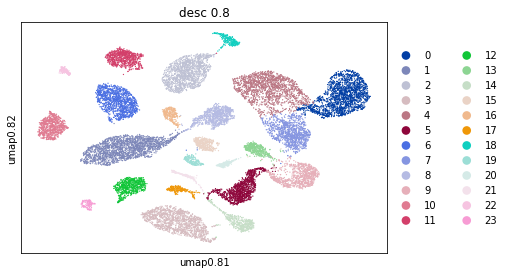

In [330]:
sc.pl.scatter(adata,basis="umap0.8",color=['desc_0.8'])

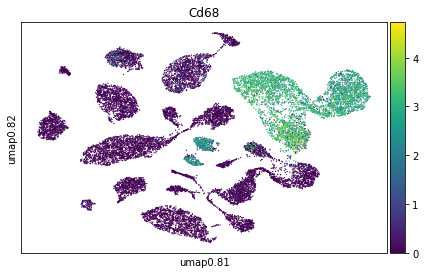

In [331]:
sc.pl.scatter(adata,basis="umap0.8",color=['Cd68'])

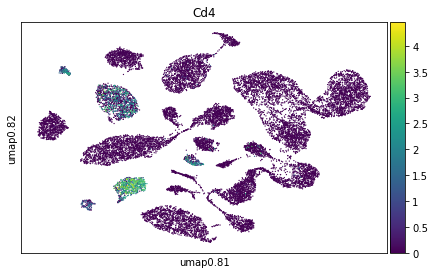

In [332]:
sc.pl.scatter(adata,basis="umap0.8",color=['Cd4'])

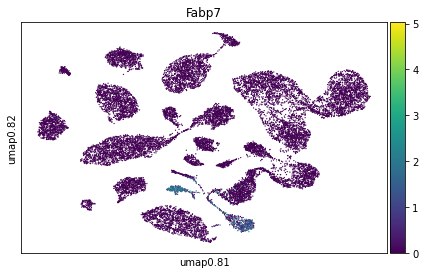

In [336]:
sc.pl.scatter(adata,basis="umap0.8",color=['Fabp7'])

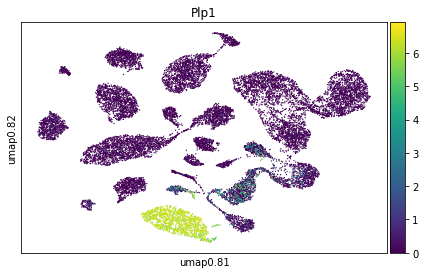

In [335]:
sc.pl.scatter(adata,basis="umap0.8",color=['Plp1'])

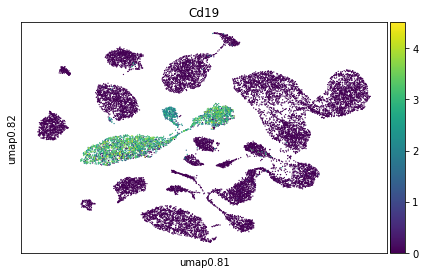

In [340]:
sc.pl.scatter(adata,basis="umap0.8",color=['Cd19'])

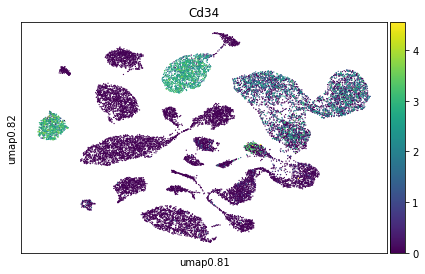

In [345]:
sc.pl.scatter(adata,basis="umap0.8",color=['Cd34'])

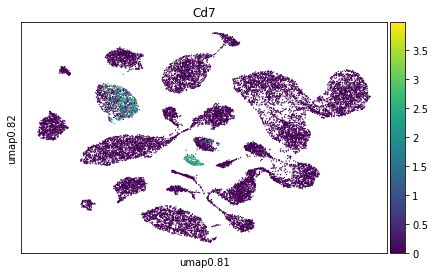

In [355]:
sc.pl.scatter(adata,basis="umap0.8",color=["Cd7"])

In [360]:
adata.obs["back_up_clust"] = adata.obs["desc_0.8"].copy()

In [374]:
cell_dict = {'microglial cell': ["0","4","7"], "B cell": ["1"], "hematopoeitic stem cell": ["2"], 
             "oligodendrocyte": ['3'],'ERCC': ['5',"9"], 'T cell': ['6','8','12'], 'hematopoeitic stem cell/oligodendrocytes/astrocytes': ['13'], 
             'astrocytes/smooth muscle cell': ['14'], 'myelod cell': ['15'], 'neuron': ['21','23','22',"16"], "Bergmann glial cell":["17"],
                                 "granulocyte":["18"],"monocyte":["19"],"brain pericyte":["20"],"endothelial cell":["10"],"neurophil":["11"]}

In [375]:
# Initialize empty column in cell metadata
adata.obs['Cell_type'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs["back_up_clust"]).isin(cell_dict[i])
    adata.obs.loc[ind,'Cell_type'] = i

In [373]:
adata.obs["back_up_clust"]

A21.MAA000508.3_9_M.1.1      6
C6.MAA000508.3_9_M.1.1       1
A22.MAA000508.3_9_M.1.1      6
C8.MAA000508.3_9_M.1.1       1
E8.MAA000508.3_9_M.1.1       1
                            ..
P18.MAA001888.3_39_F.1.1     6
P19.MAA001888.3_39_F.1.1     1
P20.MAA001888.3_39_F.1.1     6
P21.MAA001888.3_39_F.1.1     6
P22.MAA001888.3_39_F.1.1    13
Name: back_up_clust, Length: 18501, dtype: category
Categories (24, object): ['0', '1', '2', '3', ..., '20', '21', '22', '23']

In [376]:
adata.obs["Cell_type"]

A21.MAA000508.3_9_M.1.1                                                T cell
C6.MAA000508.3_9_M.1.1                                                 B cell
A22.MAA000508.3_9_M.1.1                                                T cell
C8.MAA000508.3_9_M.1.1                                                 B cell
E8.MAA000508.3_9_M.1.1                                                 B cell
                                                  ...                        
P18.MAA001888.3_39_F.1.1                                               T cell
P19.MAA001888.3_39_F.1.1                                               B cell
P20.MAA001888.3_39_F.1.1                                               T cell
P21.MAA001888.3_39_F.1.1                                               T cell
P22.MAA001888.3_39_F.1.1    hematopoeitic stem cell/oligodendrocytes/astro...
Name: Cell_type, Length: 18501, dtype: object

In [399]:
sc.settings.set_figure_params(dpi=90, facecolor='white', figsize = (10,7), color_map = "viridis")

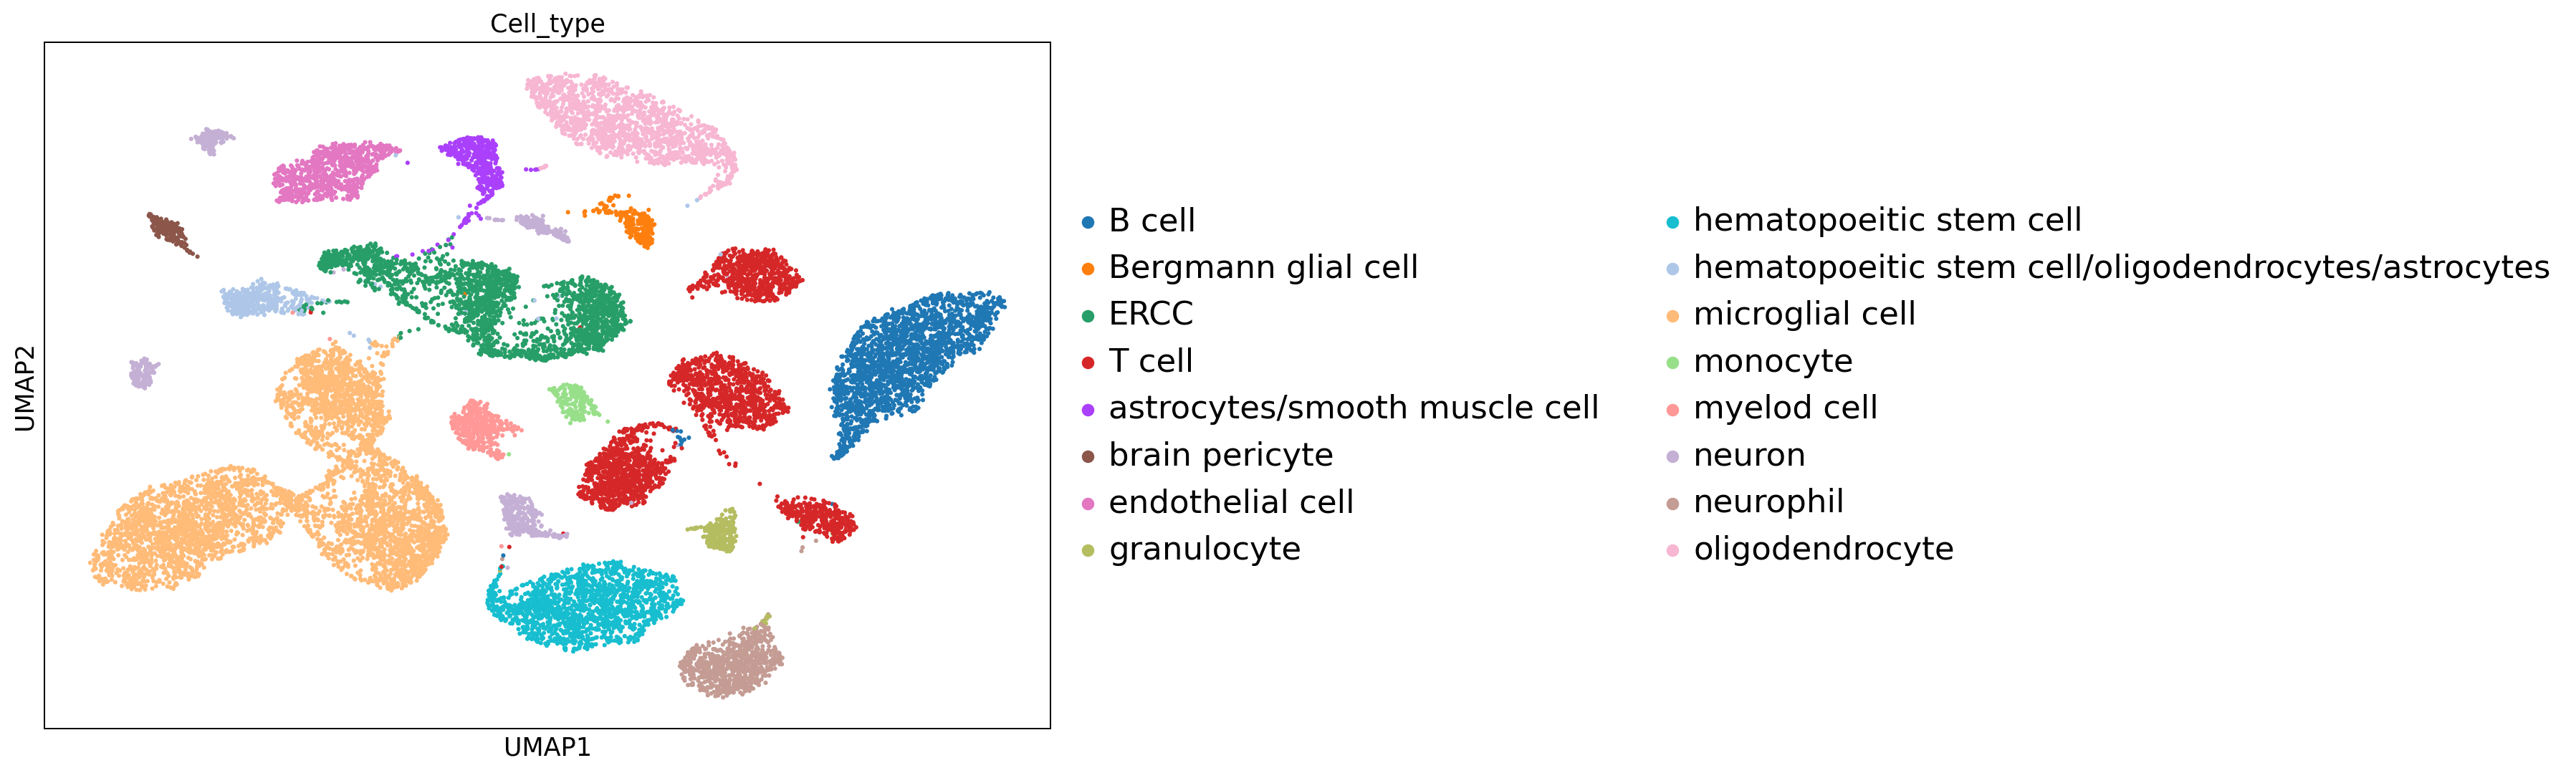

In [414]:
sc.pl.umap(adata, color=['Cell_type'], legend_loc='right margin', legend_fontsize=18,
           color_map = "magma", size = 24.0, save = "cell_types_desc.png")

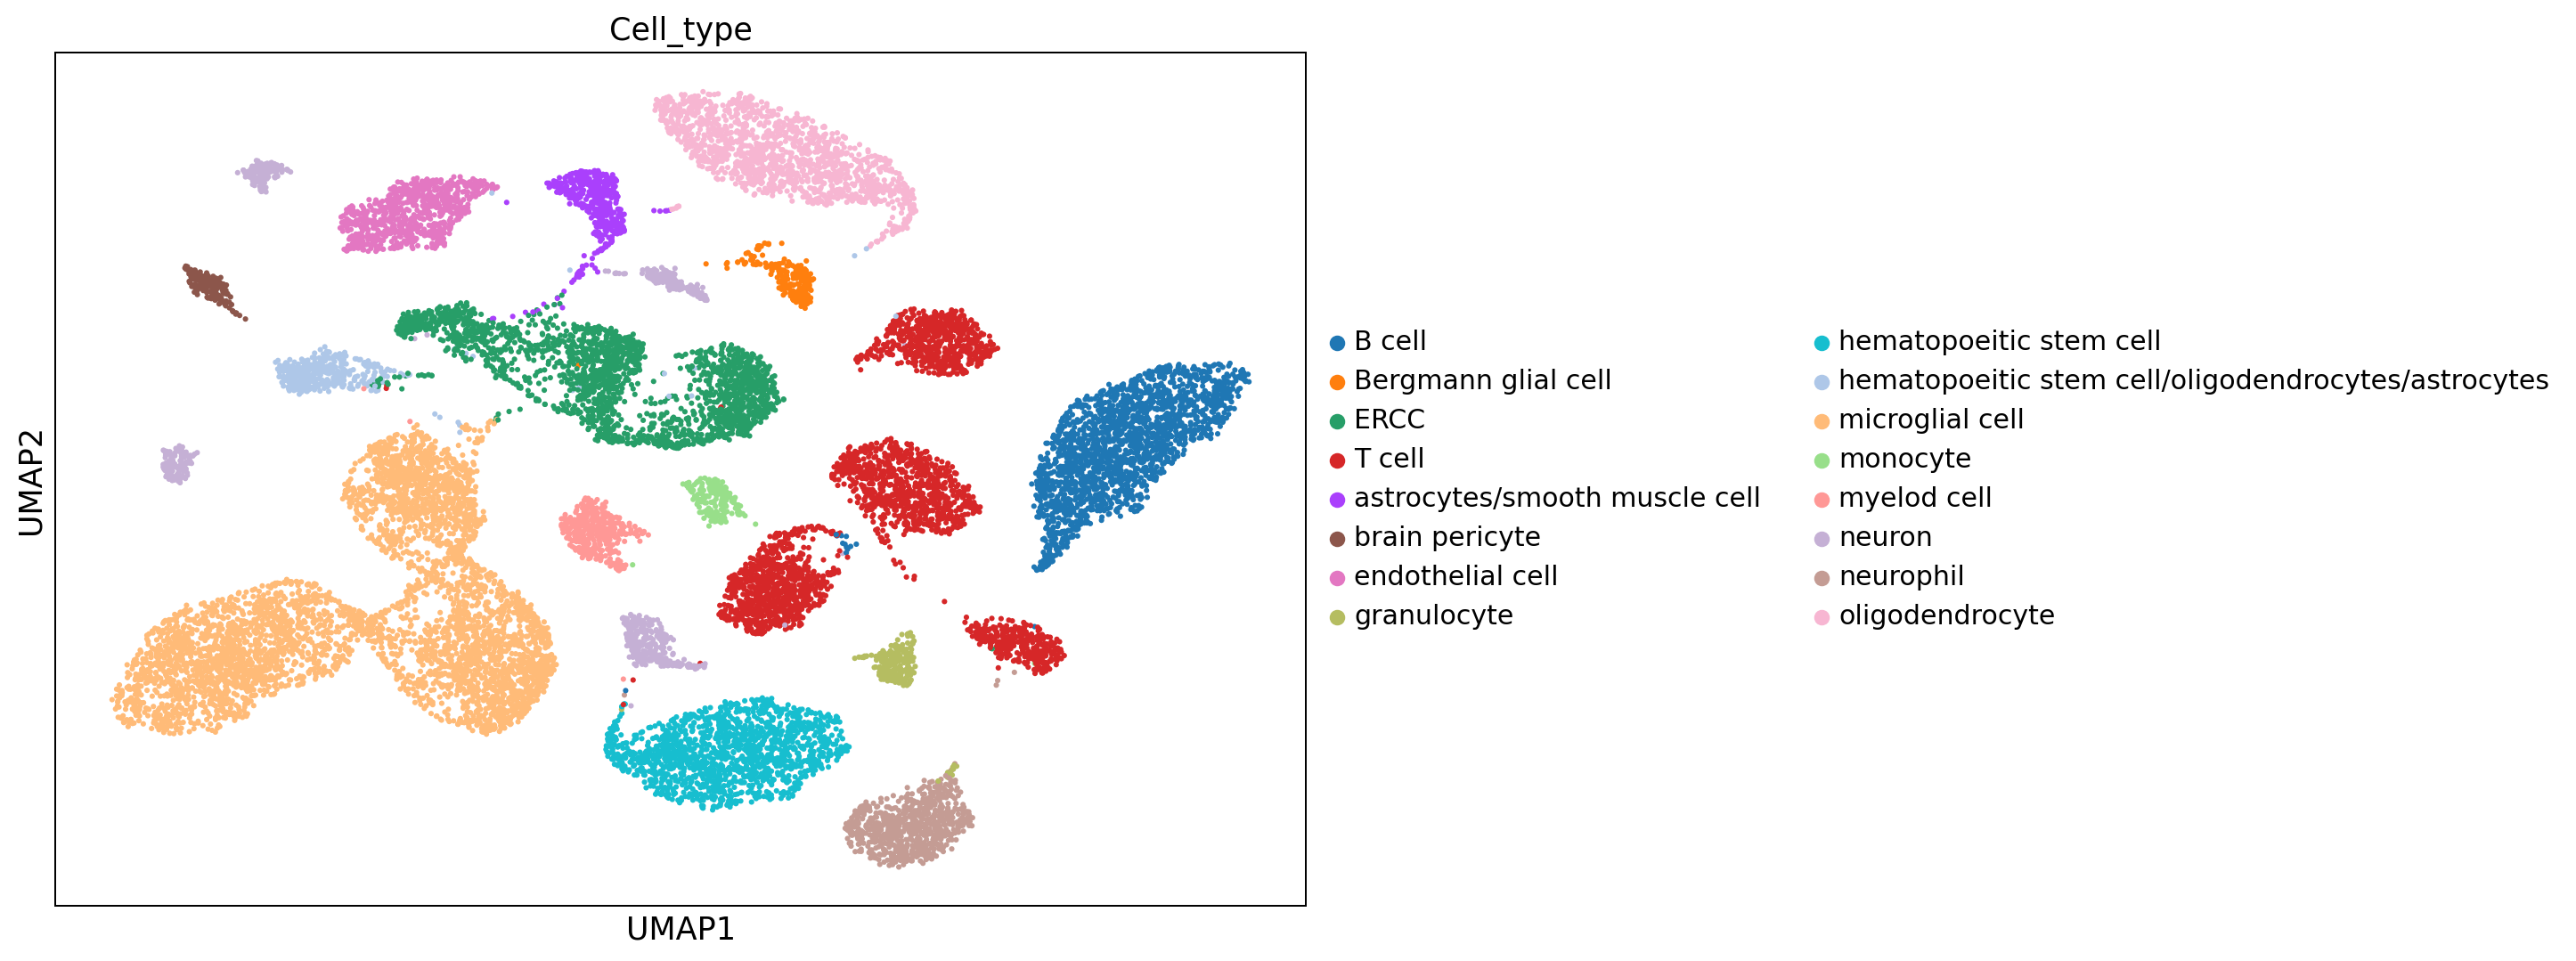

In [407]:
sc.pl.umap(adata, color=['Cell_type'], legend_loc='right margin', legend_fontsize=12,
           color_map = "magma", size = 24.0, save='cell_types_new')

In [409]:
#ARI benchmark
adata.obs

,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id,n_genes,percent_mito,n_counts,desc_0.8,desc_1.0,max.prob0.8,back_up_clust,Cell_type
A21.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,1468,0.0,149684.0,T cell,8,0.635671,6,T cell
C6.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2169,0.0,264643.0,B cell,1,0.646908,1,B cell
A22.MAA000508.3_9_M.1.1,Spleen,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,2527,0.0,404945.0,T cell,8,0.627659,6,T cell
C8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2742,0.0,425330.0,B cell,1,0.649897,1,B cell
E8.MAA000508.3_9_M.1.1,Spleen,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,2315,0.0,314558.0,B cell,1,0.648502,1,B cell
...,...,...,...,...,...,...,...,...,...,...,...,...
P18.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,2463,0.0,175214.0,T cell,8,0.634368,6,T cell
P19.MAA001888.3_39_F.1.1,Marrow,B cell,http://purl.obolibrary.org/obo/CL_0000236,CL:0000236,1557,0.0,100486.0,B cell,1,0.645184,1,B cell
P20.MAA001888.3_39_F.1.1,Marrow,natural killer cell,http://purl.obolibrary.org/obo/CL_0000623,CL:0000623,2402,0.0,265782.0,T cell,15,0.643227,6,T cell
P21.MAA001888.3_39_F.1.1,Marrow,T cell,http://purl.obolibrary.org/obo/CL_0000084,CL:0000084,1963,0.0,82693.0,T cell,8,0.617309,6,T cell


In [411]:
#save annotations
adata.obs.to_csv("annotations_DESC.csv")

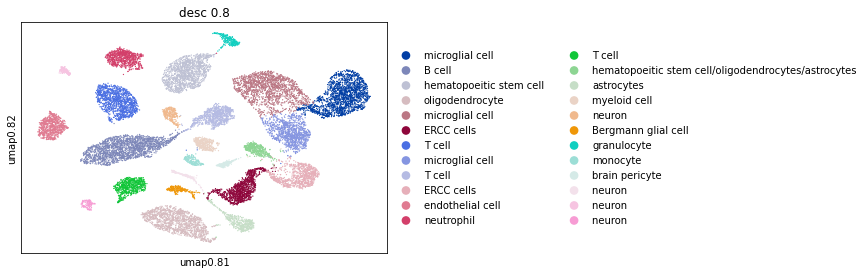

In [363]:
#compare cell ontology class and cell type, plot percentage overlap 